In [1]:
#loading necessary packages
import csv
import numpy as np
import math
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import random
import datetime

%matplotlib inline

In [2]:
clean_movie = pd.read_csv('../movies_clean.csv')

In [3]:
clean_movie.head()

,budget,revenue,runtime,vote_average,release_timespan,popularity_scaled,10402,10749,10751,10752,...,27,28,35,36,37,53,80,878,9648,99
0,30000000.0,373554033.0,81.0,7.7,23.0,3.088628,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,65000000.0,262797249.0,104.0,6.9,23.0,2.834127,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16000000.0,81452156.0,127.0,6.1,23.0,1.350536,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,60000000.0,187436818.0,170.0,7.7,23.0,2.886192,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,35000000.0,64350171.0,106.0,5.5,23.0,1.654713,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


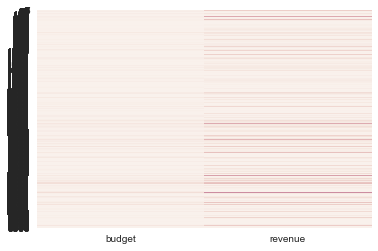

In [6]:
sns.heatmap(clean_movie[['budget','revenue']], cbar=False)

In [5]:
movies = pd.read_csv('../movies_metadata.csv')
movies.dropna(axis = 0)

/Users/veronicahsieh/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,3.521940e+08,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0
68,False,"{'id': 43563, 'name': 'Friday Collection', 'po...",3500000,"[{'id': 35, 'name': 'Comedy'}]",http://www.newline.com/properties/friday.html,10634,tt0113118,en,Friday,Craig and Smokey are two guys in Los Angeles h...,...,1995-04-26,2.821592e+07,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A lot can go down between thursday and saturda...,Friday,False,7.0,513.0
69,False,"{'id': 10924, 'name': 'From Dusk Till Dawn Col...",19000000,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",http://www.miramax.com/movie/from-dusk-till-dawn/,755,tt0116367,en,From Dusk Till Dawn,Seth Gecko and his younger brother Richard are...,...,1996-01-19,2.583662e+07,108.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One night is all that stands between them and ...,From Dusk Till Dawn,False,6.9,1644.0
153,False,"{'id': 439053, 'name': 'Brooklyn Cigar Store C...",2000000,"[{'id': 35, 'name': 'Comedy'}]",http://miramax.com/movie/blue-in-the-face/,5894,tt0112541,en,Blue in the Face,"Auggie runs a small tobacco shop in Brooklyn, ...",...,1995-09-15,1.275000e+06,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the planet Brooklyn.,Blue in the Face,False,6.8,28.0
178,False,"{'id': 286162, 'name': 'Power Rangers Collecti...",15000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.powerrangers.com/,9070,tt0113820,en,Mighty Morphin Power Rangers: The Movie,Power up with six incredible teens who out-man...,...,1995-06-30,6.600000e+07,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Power Is On!,Mighty Morphin Power Rangers: The Movie,False,5.2,153.0
219,False,"{'id': 182813, 'name': 'Clerks Collection', 'p...",27000,"[{'id': 35, 'name': 'Comedy'}]",http://www.miramax.com/movie/clerks/,2292,tt0109445,en,Clerks,Convenience and video store clerks Dante and R...,...,1994-09-13,3.151130e+06,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just because they serve you doesn't mean they ...,Clerks,False,7.4,769.0
256,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,11,tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,...,1977-05-25,7.753980e+08,121.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"A long time ago in a galaxy far, far away...",Star Wars,False,8.1,6778.0
309,False,"{'id': 144200, 'name': 'Swan Princess Series',...",35000000,"[{'id': 16, 'name': 'Animation'}]",http://www.sonypictures.com/movies/theswanprin...,22586,tt0111333,en,The Swan Princess,The beautiful princess Odette is transformed i...,...,1994-11-18,9.771658e+06,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,An enchanting classic destined to capture your...,The Swan Princess,False,6.5,251.0
359,False,"{'id': 94032, 'name': 'The Lion King Collectio...",45000000,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://movies.disney.com/the-lion-king,8587,tt0110357,en,The Lion King,A young lion cub named Simba can't wait to be ...,...,1994-06-23,7.882418e+08,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Life's greatest adventure is finding your plac...,The Lion King,False,8.0,5520.0
475,False,"{'id': 328, 'name': 'Jurassic Park Collection'...",63000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",http://www.jurassicpark.com/,329,tt0107290,

In [6]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [7]:
def clean_genre(frame,orig_col,new_col):
    frame[new_col] = frame[orig_col].str.split(',').apply(lambda x: x[0].split(',')[0][7:])
    return frame

In [8]:
a = clean_genre(movies,'genres','movie_genre')
a.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,movie_genre
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,16
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,12
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,10749
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,35
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,35


In [22]:
def make_genres_map(dict, filepath):
    genre_file = open(filepath)
    genre_reader = csv.reader(genre_file)
    next(genre_reader)
    for row in genre_reader:
        dict.update({row[0]:row[1]}) 
    return genres_map

In [47]:
a = a[a.movie_genre != "': 'Odyssey Media'"]
a = a[a.movie_genre != "': 'Carousel Productions'"]
a = a[a.movie_genre != "': 'Aniplex'"]

In [23]:
genres_map = {}
genre_names = make_genres_map(genres_map,"../genres_map.csv")
genre_names

{'10402': 'Music',
 '10749': 'Romance',
 '10751': 'Family',
 '10752': 'War',
 '10769': 'Foreign',
 '10770': 'TV Movie',
 '12': 'Adventure',
 '14': 'Fantasy',
 '16': 'Animation',
 '18': 'Drama',
 '27': 'Horror',
 '28': 'Action',
 '35': 'Comedy',
 '36': 'History',
 '37': 'Western',
 '53': 'Thriller',
 '80': 'Crime',
 '878': 'Science Fiction',
 '9648': 'Mystery',
 '99': 'Documentary'}

In [27]:
a['movie_genre'].sort_values()

45465                             
30652                             
38179                             
38178                             
38175                             
38168                             
38161                             
14504                             
2140                              
38181                             
38156                             
14534                             
30670                             
18944                             
38137                             
18932                             
38126                             
6986                              
14536                             
14532                             
38185                             
38187                             
38192                             
2104                              
30560                             
30564                             
38273                             
30578                             
30600               

In [41]:
genre_names.get('28')

'Action'

In [45]:
for i in a['movie_genre']:
    a['genre_name'][i] = genre_names.get(i)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,movie_genre,genre_name
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,16,None
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,12,None
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,10749,None
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,35,None
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,35,None


In [50]:
a['revenue'].describe()

count    4.546000e+04
mean     1.120935e+07
std      6.433225e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

In [55]:
clean_movie.head()

,budget,revenue,runtime,vote_average,release_timespan,popularity_scaled,10402,10749,10751,10752,...,27,28,35,36,37,53,80,878,9648,99
0,30000000.0,373554033.0,81.0,7.7,23.0,3.088628,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,65000000.0,262797249.0,104.0,6.9,23.0,2.834127,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16000000.0,81452156.0,127.0,6.1,23.0,1.350536,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,60000000.0,187436818.0,170.0,7.7,23.0,2.886192,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,35000000.0,64350171.0,106.0,5.5,23.0,1.654713,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [56]:
sns.distplot(x='revenue',y='release_timespan',hist=False, data = clean_movie)

TypeError: distplot() got an unexpected keyword argument 'x'

In [59]:
movies['runtime'] = pd.to_numeric(movies['runtime'], errors='coerce')

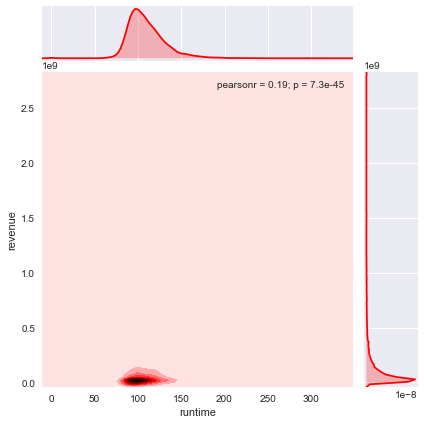

In [64]:
sns.jointplot(x=clean_movie['runtime'], y=clean_movie['revenue'], kind="kde", color="r");

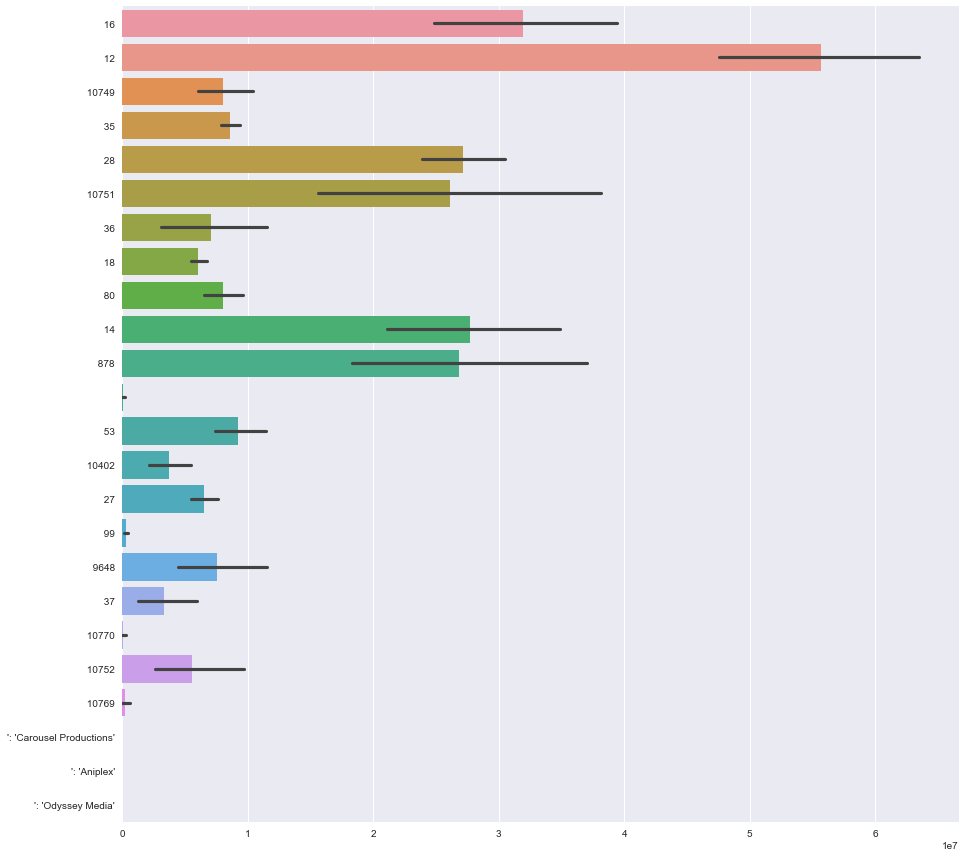

In [53]:
# ADDED: Extract axes.
fig, ax = plt.subplots(1, 1, figsize = (15, 15))

# ADDED: Remove labels.

sns.barplot(x='revenue', y='movie_genre', data=movies)
ax.set_ylabel('')    
ax.set_xlabel('')